# Chapter 10. Data Aggregation and Group Operations
# 10.1 GroupBy Mechanics

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                  'key2' : ['one', 'two', 'one', 'two', 'one'],
                  'data1' : np.random.randn(5),
                  'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.973708,-0.266991
1,a,two,1.295695,-0.030086
2,b,one,-0.164669,-0.662681
3,b,two,-0.275735,1.206140
4,a,one,0.069072,-0.047758


In [3]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [4]:
grouped.mean()

key1
a    0.130353
b   -0.220202
Name: data1, dtype: float64

In [5]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.452318
      two     1.295695
b     one    -0.164669
      two    -0.275735
Name: data1, dtype: float64

In [6]:
means.unstack()

key2,one,two
key1,,
a,-0.452318,1.295695
b,-0.164669,-0.275735


In [7]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    1.295695
            2006   -0.164669
Ohio        2005   -0.624721
            2006    0.069072
Name: data1, dtype: float64

In [8]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.130353,-0.114945
b,-0.220202,0.271729


In [9]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.452318 -0.157374
     two   1.295695 -0.030086
b    one  -0.164669 -0.662681
     two  -0.275735  1.206140

In [10]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

## Iterating Over Groups

In [11]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.973708 -0.266991
1    a  two  1.295695 -0.030086
4    a  one  0.069072 -0.047758
b
  key1 key2     data1     data2
2    b  one -0.164669 -0.662681
3    b  two -0.275735  1.206140


In [12]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.973708 -0.266991
4    a  one  0.069072 -0.047758
('a', 'two')
  key1 key2     data1     data2
1    a  two  1.295695 -0.030086
('b', 'one')
  key1 key2     data1     data2
2    b  one -0.164669 -0.662681
('b', 'two')
  key1 key2     data1    data2
3    b  two -0.275735  1.20614


In [13]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,-0.164669,-0.662681
3,b,two,-0.275735,1.206140


In [14]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [15]:
grouped = df.groupby(df.dtypes, axis=1)
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0 -0.973708 -0.266991
1  1.295695 -0.030086
2 -0.164669 -0.662681
3 -0.275735  1.206140
4  0.069072 -0.047758
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


## Selecting a Column or Subset of Columns

In [16]:
df.groupby('key1')['data1']

In [17]:
df.groupby('key1')[['data2']]

In [18]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.157374
     two  -0.030086
b    one  -0.662681
     two   1.206140

In [19]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

In [20]:
s_grouped.mean()

key1  key2
a     one    -0.157374
      two    -0.030086
b     one    -0.662681
      two     1.206140
Name: data2, dtype: float64

## Grouping with Dicts and Series

In [21]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people

,a,b,c,d,e
Joe,0.420335,-2.023836,1.047579,-0.530914,-0.707732
Steve,1.465384,-2.053101,1.908146,0.536350,0.039238
Wes,-1.871584,-0.164417,-1.302655,-1.032792,-0.420973
Jim,0.748134,0.101874,-0.637340,1.970285,-0.111598
Travis,0.929629,0.570040,0.631701,-1.271029,0.767905


In [22]:
 people.iloc[2:3, [1, 2]]

,b,c
Wes,-0.164417,-1.302655


In [23]:
people.iloc[2:3, [1, 2]] = np.nan
people

,a,b,c,d,e
Joe,0.420335,-2.023836,1.047579,-0.530914,-0.707732
Steve,1.465384,-2.053101,1.908146,0.536350,0.039238
Wes,-1.871584,NaN,NaN,-1.032792,-0.420973
Jim,0.748134,0.101874,-0.637340,1.970285,-0.111598
Travis,0.929629,0.570040,0.631701,-1.271029,0.767905


In [24]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue','d': 'blue', 'e': 'red', 'f' : 'orange'}
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,0.516665,-2.311233
Steve,2.444495,-0.548479
Wes,-1.032792,-2.292557
Jim,1.332945,0.738411
Travis,-0.639327,2.267575


In [25]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [26]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


## Grouping with Functions

In [27]:
people.groupby(len).sum()

,a,b,c,d,e
3,-0.703115,-1.921962,0.410239,0.406579,-1.240302
5,1.465384,-2.053101,1.908146,0.536350,0.039238
6,0.929629,0.570040,0.631701,-1.271029,0.767905


In [28]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -1.871584 -2.023836  1.047579 -1.032792 -0.707732
  two  0.748134  0.101874 -0.637340  1.970285 -0.111598
5 one  1.465384 -2.053101  1.908146  0.536350  0.039238
6 two  0.929629  0.570040  0.631701 -1.271029  0.767905

## Grouping by Index Levels

In [29]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.779876 -0.787827 -1.099147 -0.132196 -0.910375
1     -0.444167  0.234163  0.396424 -1.349286  0.211476
2     -0.719637  0.571184  0.478053  1.052087  1.074117
3     -1.229304 -1.419261 -0.305407  0.736014  0.649899

In [30]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


# 10.2 Data Aggregation

In [31]:
df

,key1,key2,data1,data2
0,a,one,-0.973708,-0.266991
1,a,two,1.295695,-0.030086
2,b,one,-0.164669,-0.662681
3,b,two,-0.275735,1.206140
4,a,one,0.069072,-0.047758


In [32]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    1.050371
b   -0.175776
Name: data1, dtype: float64

In [33]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [34]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,2.269403,0.236905
b,0.111065,1.868821


In [35]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.130353  1.135942 -0.973708 -0.452318  0.069072  0.682384   
b      2.0 -0.220202  0.078535 -0.275735 -0.247968 -0.220202 -0.192435   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.295695   3.0 -0.114945  0.131972 -0.266991 -0.157374 -0.047758   
b    -0.164669   2.0  0.271729  1.321456 -0.662681 -0.195476  0.271729   

                          
           75%       max  
key1                      
a    -0.038922 -0.030086  
b     0.738934  1.206140

## Column-Wise and Multiple Function Application

In [36]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [37]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
5,25.29,4.71,No,Sun,Dinner,4,0.228863


In [38]:
grouped = tips.groupby(['day', 'smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.179740
      Yes       0.216293
Sat   No        0.190412
      Yes       0.179833
Sun   No        0.193617
      Yes       0.322021
Thur  No        0.193424
      Yes       0.198508
Name: tip_pct, dtype: float64

In [39]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.179740  0.039458      0.094263
     Yes     0.216293  0.077530      0.242219
Sat  No      0.190412  0.058626      0.352192
     Yes     0.179833  0.089496      0.446137
Sun  No      0.193617  0.060302      0.274897
     Yes     0.322021  0.538061      2.382107
Thur No      0.193424  0.056065      0.284273
     Yes     0.198508  0.057170      0.219047

In [40]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.179740  0.039458
     Yes     0.216293  0.077530
Sat  No      0.190412  0.058626
     Yes     0.179833  0.089496
Sun  No      0.193617  0.060302
     Yes     0.322021  0.538061
Thur No      0.193424  0.056065
     Yes     0.198508  0.057170

In [41]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.179740  0.231125          4  18.420000  22.75
     Yes         15  0.216293  0.357737         15  16.813333  40.17
Sat  No          45  0.190412  0.412409         45  19.661778  48.33
     Yes         42  0.179833  0.483092         42  21.276667  50.81
Sun  No          57  0.193617  0.338101         57  20.506667  48.17
     Yes         19  0.322021  2.452381         19  24.120000  45.35
Thur No          45  0.193424  0.362976         45  17.113111  41.19
     Yes         17  0.198508  0.317965         17  19.190588  43.11

In [42]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.179740  0.231125
     Yes        15  0.216293  0.357737
Sat  No         45  0.190412  0.412409
     Yes        42  0.179833  0.483092
Sun  No         57  0.193617  0.338101
     Yes        19  0.322021  2.452381
Thur No         45  0.193424  0.362976
     Yes        17  0.198508  0.317965

In [43]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.179740   0.001557    18.420000   25.596333
     Yes        0.216293   0.006011    16.813333   82.562438
Sat  No         0.190412   0.003437    19.661778   79.908965
     Yes        0.179833   0.008010    21.276667  101.387535
Sun  No         0.193617   0.003636    20.506667   66.099980
     Yes        0.322021   0.289509    24.120000  109.046044
Thur No         0.193424   0.003143    17.113111   59.625081
     Yes        0.198508   0.003268    19.190588   69.808518

In [44]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [45]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.136861  0.231125  0.179740  0.039458    9
     Yes     0.115518  0.357737  0.216293  0.077530   31
Sat  No      0.060217  0.412409  0.190412  0.058626  115
     Yes     0.036955  0.483092  0.179833  0.089496  104
Sun  No      0.063204  0.338101  0.193617  0.060302  167
     Yes     0.070274  2.452381  0.322021  0.538061   49
Thur No      0.078704  0.362976  0.193424  0.056065  112
     Yes     0.098918  0.317965  0.198508  0.057170   40

## Returning Aggregated Data Without Row Indexes

In [46]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.179740
1,Fri,Yes,16.813333,2.714000,2.066667,0.216293
2,Sat,No,19.661778,3.102889,2.555556,0.190412
3,Sat,Yes,21.276667,2.875476,2.476190,0.179833
4,Sun,No,20.506667,3.167895,2.929825,0.193617
5,Sun,Yes,24.120000,3.516842,2.578947,0.322021
6,Thur,No,17.113111,2.673778,2.488889,0.193424
7,Thur,Yes,19.190588,3.030000,2.352941,0.198508


# HW

## John

1. Recreate the two plots below using this dataset: [diamonds](https://github.com/UCD-pbio-rclub/python-data-analysis_JohnD/raw/master/datasets/diamonds.csv)

Note: In the 2nd plot, there are approximately the same number of points in each bin

![Plot 1](https://d33wubrfki0l68.cloudfront.net/2bb18193f75fe829a1bfd3144efc191046bec699/e2639/eda_files/figure-html/unnamed-chunk-34-1.png)

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
df = pd.read_csv('https://github.com/UCD-pbio-rclub/python-data-analysis_JohnD/raw/master/datasets/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0.5, 0.98, '')

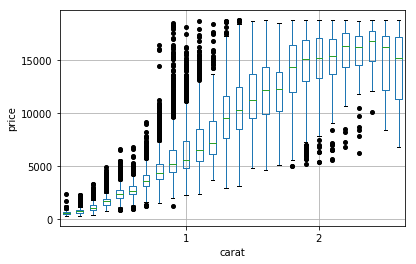

In [48]:
bins = np.arange(.2,2.9,.1)
df['binned'] = pd.cut(df['carat'], bins)
fig, ax = plt.subplots(1,1)
df.boxplot(column = 'price',
           by = 'binned',
           ax = ax,
           flierprops = dict(marker='o', markerfacecolor='black', markersize=4,
                  linestyle='none'),
          )
ax.set_xticks([10,20])
ax.set_xticklabels([1,2])
ax.set_yticks([0,5000,10000,15000])
ax.set_xlabel('carat')
ax.set_ylabel('price')
ax.set_title('')
fig.suptitle('')

![Plot 2](https://d33wubrfki0l68.cloudfront.net/2b853af846efb6683ab09371144a96b0a2e179cb/c3ba5/eda_files/figure-html/unnamed-chunk-35-1.png)

Text(0.5, 0.98, '')

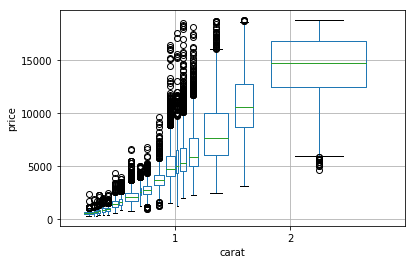

In [49]:
bins = pd.qcut(df['carat'], q = 19)
b = bins.unique().sort_values()
labels = []
widths = []
positions = []
for i in range(19):
    labels.append(round((b[i].right + b[i].left) / 2,2))
    positions.append(round((b[i].right + b[i].left) / 2,2)*4)
    widths.append((b[i].right - b[i].left) * 3)
df.binned = pd.to_numeric(pd.qcut(df['carat'], q = 19, labels= labels))
#widths = np.array(list(widths.values()))
fig, ax = plt.subplots(1,1)
df.boxplot(column = 'price',
           by = 'binned',
           ax = ax,
          widths= widths,
          positions = positions)
ax.set_xticks([4,8])
ax.set_xticklabels([1,2])
ax.set_yticks([0,5000,10000,15000])
ax.set_xlim(0,12)
ax.set_xlabel('carat')
ax.set_ylabel('price')
ax.set_title('')
fig.suptitle('')

## Min-Yao

#### Using the same data from chapter 8. (Import my RNA-Seq CPM data from 'Expression Browser_CPM_practice.xlsx' file. [Expression Browser_CPM_practice.xlsx](https://github.com/UCD-pbio-rclub/python-data-analysis_MinYaoJ/blob/master/Expression%20Browser_CPM_practice.xlsx)).

#### We are interested in lignin biosynthesis genes. Here are the genes:
#### COMT (CAFFEIC ACID O-METHYLTRANSFERASE)
#### PAL (PHENYLALANINE AMMONIA-LYASE)
#### TAL (Tyrosine Ammonia-lyase)
#### C4H (CINNAMATE 4-HYDROXYLASE)
#### C3H (p-COUMARATE 3-HYDROXYLASE)
#### 4CL (4-COUMARATE:CoA LIGASE)
#### F5H (FERULATE 5-HYDROXYLASE)

### 1. Please go to [Sol Genomics](https://solgenomics.net/) and find out the Solyc ID for these genes.

In [50]:
dat = pd.read_excel('https://github.com/UCD-pbio-rclub/python-data-analysis_MinYaoJ/raw/master/Expression%20Browser_CPM_practice.xlsx')

In [51]:
COMT = ['Solyc00g237680.2','Solyc03g080180.3','Solyc04g077770.2',
        'Solyc06g083450.3','Solyc10g005060.3','Solyc10g085830.2',
        'Solyc10g085840.1']
PAL = ['Solyc00g282510.2','Solyc02g090500.3','Solyc03g036470.2',
      'Solyc03g036473.1','Solyc03g042560.2','Solyc03g071857.1',
      'Solyc03g071870.1','Solyc03g078280.2','Solyc05g026500.1',
      'Solyc06g071760.1','Solyc09g007900.3','Solyc09g007910.3',
      'Solyc10g011920.2','Solyc10g052660.2','Solyc10g086180.2',
      ]
C4H = ['Solyc06g082530.2','Solyc06g082535.1']
FourCL = ['Solyc00g028540.2','Solyc01g110995.1','Solyc02g049070.3',
      'Solyc02g033075.1','Solyc02g069925.1','Solyc02g088720.3',
      'Solyc03g005080.3','Solyc03g025720.3','Solyc03g097030.3',
      'Solyc03g111170.3','Solyc03g114100.1','Solyc03g117870.3',
      'Solyc04g024480.1','Solyc04g080480.1','Solyc06g035960.3',
      'Solyc06g068650.3','Solyc08g076300.3','Solyc11g007970.2',
      'Solyc11g069050.2','Solyc12g042460.2','Solyc12g094520.2']

### 2. Please use the Solyc ID to find these genes in this dataset and make boxplots to show the expression level of each gene in different genotypes and treatments combination.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


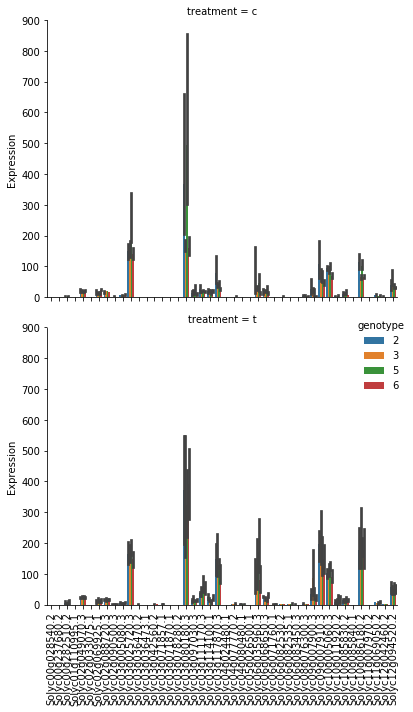

In [52]:
genes = COMT + PAL + C4H + FourCL
dat_small = dat[dat['Name'].isin(genes)]
dat_small.set_index('Name', inplace=True)
params_df = pd.DataFrame(dat_small.columns.tolist())
params_df = params_df[0].apply(lambda x: pd.Series(list(x.strip().replace('_',''))))
mindexes = pd.MultiIndex.from_frame(params_df)
dat_small.columns = mindexes
dat_small.columns.names = ['genotype', 'treatment', 'sample_number']
dat_small.index.names = ['SolycID']
dat_small = pd.DataFrame(dat_small.unstack())
dat_small.columns = ['Expression']
dat_small = dat_small.reset_index()
fg = sns.factorplot(x='SolycID', y='Expression', hue='genotype', 
                        col='treatment', data=dat_small, kind='bar',
                   col_wrap = 1)
fg.set_xlabels('')
fg.set_xticklabels(rotation=90)
plt.tight_layout()

## Joel Rodriguez

Use the weather data from the _nycflights13_ dataset (https://raw.githubusercontent.com/hadley/nycflights13/master/data-raw/weather.csv) to have some fun plotting.


1. How would you look at the overall distribution of temperatures in each airport (origin). 
For now, don't filter by month/day/hour.

In [53]:
dat = pd.read_csv('https://raw.githubusercontent.com/hadley/nycflights13/master/data-raw/weather.csv')
dat.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


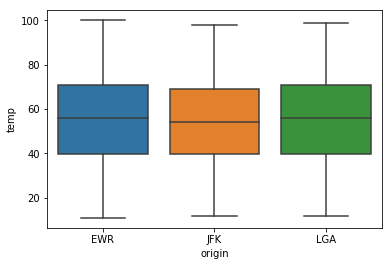

In [54]:
plt.figure()
sns.boxplot(data=dat, x='origin',y='temp')

2. Plot the temperatures over a warm and a cold month. Is the scale in farenheit or celsius? 

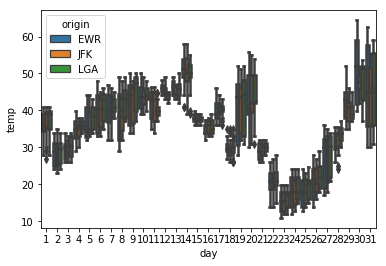

In [55]:
plt.figure()
jan = dat[(dat.month == 1)]
sns.boxplot(data = jan,
             x = 'day',
             y = 'temp',
             hue="origin",
             linewidth=2.5)

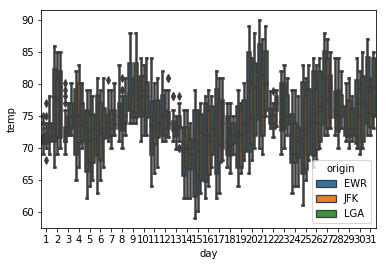

In [56]:
plt.figure()
aug = dat[(dat.month == 8)]
sns.boxplot(data = aug,
             x = 'day',
             y = 'temp',
             hue="origin",
             linewidth=2.5)

## Julin

Use the [tomato data set](https://github.com/UCD-pbio-rclub/python_problems/blob/master/Tomato.csv)

1.  Make a boxplot of hypocotyl length ("hyp") with the data plotted separately for 'species' and 'trt'.  Try making this plot both with and without using facets.

In [57]:
dat = pd.read_csv('https://github.com/UCD-pbio-rclub/python_problems/raw/master/Tomato.csv')
dat.head()

,shelf,flat,col,row,acs,trt,days,date,hyp,int1,...,petleng,leafleng,leafwid,leafnum,ndvi,lat,lon,alt,species,who
0,Z,1,B,1,LA2580,H,28,5/5/08,19.46,2.37,...,15.78,30.53,34.44,5.0,111,-9.5167,-78.0083,740,S. pennellii,Dan
1,Z,1,C,1,LA1305,H,28,5/5/08,31.28,3.34,...,12.36,22.93,13.99,4.0,120,-13.3833,-75.3583,3360,S. peruvianum,Dan
2,Z,1,D,1,LA1973,H,28,5/5/08,56.65,8.43,...,13.05,46.71,43.78,5.0,110,-16.2333,-71.7000,2585,S. peruvianum,Dan
3,Z,1,E,1,LA2748,H,28,5/5/08,35.18,0.56,...,8.08,26.82,33.28,5.0,105,-20.4833,-69.9833,1020,S. chilense,Dan
4,Z,1,F,1,LA2931,H,28,5/5/08,35.32,0.82,...,7.68,22.40,23.61,5.0,106,-20.9167,-69.0667,2460,S. chilense,Dan


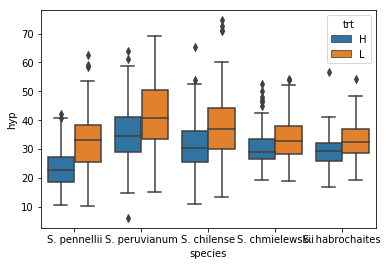

In [58]:
plt.figure()
sns.boxplot(data=dat,
           x='species',
           y='hyp',
           hue='trt')

2. Make a plot of the internode data, int1, int2, int3, and int4 where each internode is in a different facet.  plot values for each trt and species.  Layout the plot so that it is a 2X2 grid 

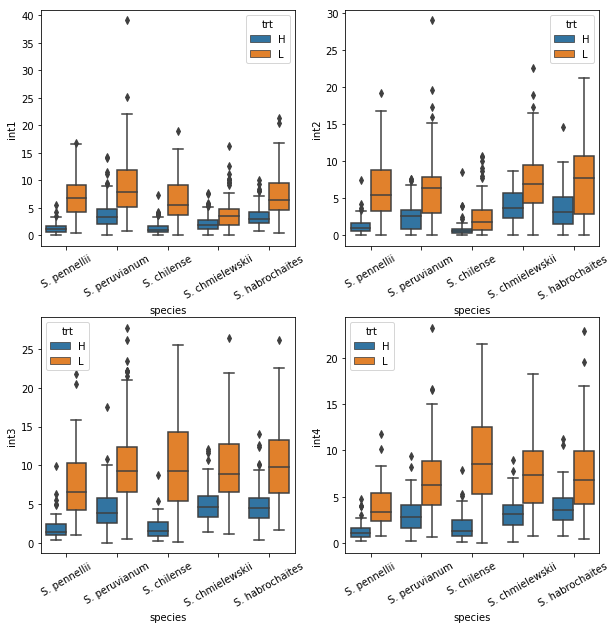

In [59]:
nodes = ['int1','int2','int3','int4']
fig, axes = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=.2, hspace=.3)
count = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=dat,
           x='species',
           y=nodes[count],
           hue='trt',
           ax=axes[i,j])
        axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),rotation=30)
        count += 1

## Kae 

Using the data [here](https://raw.githubusercontent.com/UCD-pbio-rclub/python-data-analysis_KaeL/master/titanic.csv) please make a bar graph showing the number of men and the number of women (a bar for each) that survived the trip on the titanic at each age point.

In [60]:
titanic=pd.read_csv('datasets/titanic.csv', sep='\t') #, names=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[Text(0, 0, '0.83'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '12.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '15.0'),
 Text(0, 0, '17.0'),
 Text(0, 0, '19.0'),
 Text(0, 0, '21.0'),
 Text(0, 0, '22.0'),
 Text(0, 0, '23.0'),
 Text(0, 0, '24.0'),
 Text(0, 0, '26.0'),
 Text(0, 0, '27.0'),
 Text(0, 0, '28.0'),
 Text(0, 0, '29.0'),
 Text(0, 0, '30.0'),
 Text(0, 0, '32.0'),
 Text(0, 0, '32.5'),
 Text(0, 0, '33.0'),
 Text(0, 0, '34.0'),
 Text(0, 0, '35.0'),
 Text(0, 0, '38.0'),
 Text(0, 0, '49.0'),
 Text(0, 0, '55.0'),
 Text(0, 0, '58.0')]

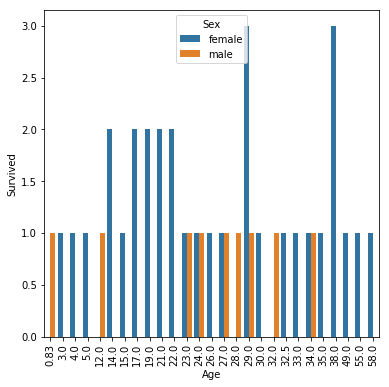

In [61]:
survive = pd.DataFrame(titanic.groupby(['Sex','Age'])['Survived'].sum())
survive = survive.loc[(survive!=0).any(1)]
survive.reset_index(inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
sns.barplot(data=survive,
           x='Age',
           y='Survived',
           hue='Sex',
           ax = ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## HW Problem
1. Load the [diamonds](https://github.com/UCD-pbio-rclub/python-data-analysis_JohnD/raw/master/datasets/diamonds.csv) dataset.
2. Find the max price of each cut and color combination
3. Find the min, max, and average dimensions (x,y,z) of a diamond for each carat size

In [62]:
dat = pd.read_csv('https://github.com/UCD-pbio-rclub/python-data-analysis_JohnD/raw/master/datasets/diamonds.csv')

In [63]:
grouped = dat.groupby(['cut','color'])
grouped_price = grouped['price']
grouped_price.agg('max')

cut        color
Fair       D        16386
           E        15584
           F        17995
           G        18574
           H        18565
           I        17408
           J        15824
Good       D        18468
           E        18236
           F        18686
           G        18788
           H        18640
           I        18707
           J        18325
Ideal      D        18693
           E        18729
           F        18780
           G        18806
           H        18760
           I        18779
           J        18508
Premium    D        18575
           E        18477
           F        18791
           G        18741
           H        18795
           I        18823
           J        18706
Very Good  D        18542
           E        18731
           F        18777
           G        18818
           H        18803
           I        18500
           J        18430
Name: price, dtype: int64

In [64]:
grouped = dat.groupby(['carat'])
functions = ['count', 'mean', 'max']
grouped_dims = grouped['x','y','z']
grouped_dims.agg(functions)

x                     y                     z                
      count      mean   max count      mean   max count      mean   max
carat                                                                  
0.20     12  3.786667  3.86    12  3.753333  3.84    12  2.303333  2.36
0.21      9  3.874444  3.96     9  3.837778  3.93     9  2.332222  2.40
0.22      5  3.898000  3.93     5  3.848000  3.89     5  2.386000  2.49
0.23    293  3.946382  4.14   293  3.973379  4.19   293  2.431468  2.50
0.24    254  3.990157  4.12   254  4.019331  4.15   254  2.465591  2.54
0.25    212  4.062500  5.33   212  4.086934  5.28   212  2.506934  3.12
0.26    253  4.102688  4.24   253  4.124704  4.28   253  2.536364  2.62
0.27    233  4.159142  4.30   233  4.181588  4.36   233  2.567897  2.66
0.28    198  4.207172  4.38   198  4.233687  4.41   198  2.595707  2.69
0.29    130  4.262846  4.48   130  4.290538  4.42   130  2.624000  2.72
0.30   2604  4.299443  4.67  2604  4.308061  4.62  2604  2.664351  2.78
0.31   2249  4.353219  4.61  2249  4.360912  4.60  2249  2.690422  2.78
0.32   1840  4.399821  4.60  1840  4.406995  4.65  1840  2.717755  2.80
0.33   1189  4.449521  4.85  1189  4.456569  4.79  1189  2.741447  2.95
0.34    910  4.495363  6.65   910  4.499560  4.77   910  2.768714  2.89
0.35    667  4.544693  5.67   667  4.550825  5.64   667  2.801049  3.66
0.36    572  4.580927  4.79   572  4.590105  4.79   572  2.819266  2.90
0.37    394  4.625228  4.96   394  4.632944  4.91   394  2.839949  2.94
0.38    670  4.662403  4.85   670  4.677313  4.88   670  2.866955  2.95
0.39    398  4.696156  4.91   398  4.713593  6.02   398  2.898116  4.44
0.40   1299  4.727991  4.94  1299  4.738199  4.97  1299  2.928922  3.03
0.41   1382  4.769247  4.98  1382  4.775427  4.97  1382  2.949906  3.04
0.42    706  4.814717  5.11   706  4.821303  5.11   706  2.970354  3.05
0.43    488  4.851844  5.00   488  4.859816  5.03   488  2.991168  3.07
0.44    212  4.892594  5.12   212  4.900189  5.07   212  3.012123  3.08
0.45    110  4.920545  5.10   110  4.908273  5.14   110  3.040545  3.21
0.46    178  4.952135  5.16   178  4.965281  5.24   178  3.064775  3.21
0.47     99  5.001212  5.19    99  5.010101  5.21    99  3.076869  3.24
0.48     63  5.045714  5.29    63  5.061429  5.26    63  3.090794  3.20
0.49     45  5.108444  5.26    45  5.097556  5.25    45  3.094444  3.20
...     ...       ...   ...   ...       ...   ...   ...       ...   ...
2.45      4  8.700000  8.72     4  8.672500  8.81     4  5.352500  5.49
2.46      3  8.693333  8.82     3  8.616667  8.76     3  5.353333  5.44
2.47      3  8.713333  8.85     3  8.653333  8.79     3  5.323333  5.39
2.48      9  8.674444  8.88     9  8.604444  8.76     9  5.340000  5.45
2.49      3  8.526667  8.76     3  8.456667  8.70     3  5.413333  5.45
2.50     17  8.567647  8.80    17  8.517059  8.89    17  5.418235  5.58
2.51     17  8.714118  8.88    17  8.684706  8.87    17  5.351765  5.48
2.52      9  8.641111  8.90     9  8.581111  8.87     9  5.425556  5.60
2.53      8  8.747500  8.90     8  8.663750  8.82     8  5.392500  5.46
2.54      9  8.713333  8.83     9  8.674444  8.78     9  5.448889  5.50
2.55      3  8.686667  8.70     3  8.603333  8.65     3  5.430000  5.49
2.56      3  8.703333  8.76     3  8.686667  8.76     3  5.403333  5.47
2.57      3  8.860000  8.99     3  8.773333  8.94     3  5.383333  5.49
2.58      3  8.810000  9.08     3  8.750000  9.01     3  5.460000  5.57
2.59      1  8.830000  8.83     1  8.770000  8.77     1  5.430000  5.43
2.60      3  8.820000  9.05     3  8.750000  8.94     3  5.423333  5.54
2.61      3  8.706667  8.85     3  8.623333  8.73     3  5.513333  5.55
2.63      3  8.800000  8.83     3  8.816667  8.88     3  5.480000  5.50
2.64      1  8.880000  8.88     1  8.830000  8.83     1  5.520000  5.52
2.65      1  8.820000  8.82     1  8.750000  8.75     1  5.450000  5.45
2.66      3  8.710000  8.71     3  8.650000  8.65     3  5.553333  5.58
2.67      1  8.690000  8.69     1  8.640000  8.64 